# Step1. 검증용 데이터셋 준비


In [52]:
import matplotlib.pyplot as plt
import keras_ocr
import warnings
warnings.filterwarnings( 'ignore' )

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [60]:
image_urls = [
  '01.png',
  '02.png',
  '03.png',
  '04.png',
  '05.png',
  '06.png',
  '07.png',
  '08.png',
  '09.png',
  '10.png',  
  '11.png',  
  '12.png',  
  '13.png',  
  '14.png',  
  '15.png',  
  '16.png',  
  '17.png',
  '18.png',
  '19.png',
  '20.png',
  '21.png',
  '22.png',
  '23.png',
  '24.png',
  '25.png',
]

kor_image_urls = [
  '02.png',
  '04.png',
  '05.png',  
  '15.png',  
  '16.png',  
  '20.png',
  '21.png',
  '22.png',
  '23.png',
  '25.png',
]

eng_image_urls = [
  '01.png',
  '03.png',
  '06.png',
  '07.png',
  '08.png',
  '09.png',
  '10.png',  
  '11.png',  
  '12.png',  
  '13.png',  
  '14.png',  
  '17.png',
  '18.png',
  '19.png',
  '24.png',
]


# Step2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)

## Step3-1. 테스트 결과 정리(keras-ocr)

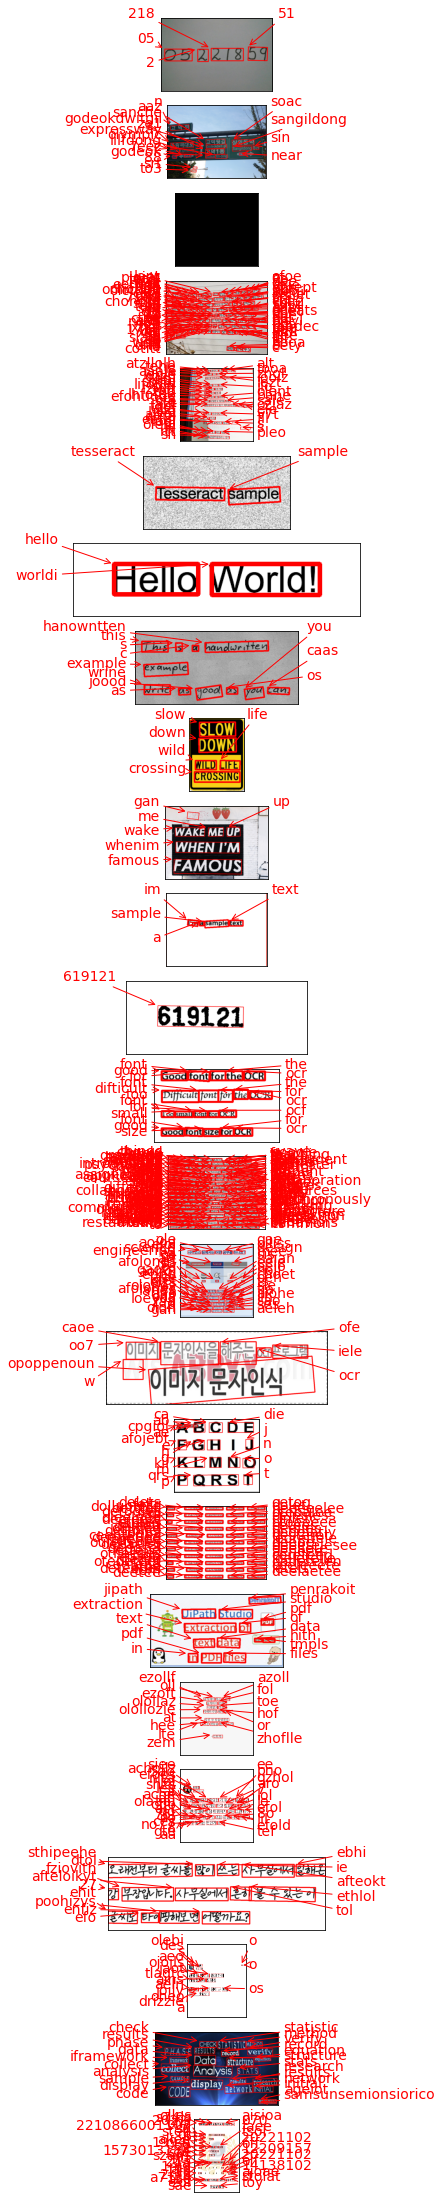

In [28]:
#keras-ocr

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls] 

# Plot the predictions
fig, axs = plt.subplots(nrows=len(images) , figsize=(40, 40))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [55]:
#Tesseract

import os
import pytesseract
from PIL import Image
from pytesseract import Output

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/02.png'   # 1번 이미지 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_python/0014.png
/aiffel/aiffel/ocr_python/0015.png
/aiffel/aiffel/ocr_python/0016.png
/aiffel/aiffel/ocr_python/0017.png
/aiffel/aiffel/ocr_python/0018.png
/aiffel/aiffel/ocr_python/0019.png
/aiffel/aiffel/ocr_python/0020.png
/aiffel/aiffel/ocr_python/0021.png
/aiffel/aiffel/ocr_python/0022.png
/aiffel/aiffel/ocr_python/0023.png
/aiffel/aiffel/ocr_python/0024.png


In [58]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")
    
def recognize_kor_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준-비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_kor_images(cropped_image_path_list)

~ 아두 오이 이아

개

기

이토

에

슨

플그

동역

0100

[[


그러

더

(| )_200

0

개

  |

0

「

11100

고


때



Done


In [57]:
recognize_images(cropped_image_path_list)

— a eS aS

pol

=

1He

al

A

oe

Fa

kdwit-

jl


ue

-_

Hi )-A0

lo

-

| |

—

r

Sangilaong

Si

4

‘.

>


Done


## Step3-2. 테스트 결과 정리(Tesseract)

In [61]:
for i in eng_image_urls:
    img_file_path = work_dir + '/' + i
    cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
    recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
O5

BAAS

5Y


Done
/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
Chalkboard:

Tne

quick

brown

fox

Jumps

OVeT

The

lazy

dog.

Done
/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
Tesseract

Sample

Done
/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
Hello

World!

Done
/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffe

THINGS

YOU

SMUOU LU

RNUVY

ABUL

———_

(POOUGLE

V\/AVE

sScenaric

lamara,

S|

eraduate

student

and

1A,

1s

teaching

OTe

section

of

/()

students

from

Un

Bristol's

200-studen

t lecture

LUISE,

Introduction

to

Psychology

Before

the

semester

begins,

‘Tamara

and

the

nine

other

‘LAS

meet

with

ir.

Bristol.

He

--<i-

plains

that

assignments

will

he

done

by

student

Teams

us =

ing

rail

application

called

Wave

tor

the

coursework.

Wave,

he

2a yO,

is

like

e-mail,

SOrt

of,

and

like

cd

chat

and

collaboration

sale,

Sort

of,

but

that

it

is

different

from

tools

they

have

used

hefore.

Students

will

use

Wave

ro

collaborate,

chare

TPSOUTCES

and

data,

talk

through

their

findings,

and

discover

Ways

ce

apply

what

they

learn

ce

other

prolects.

Wave

(all

he

used

synchronously

a

SystemError: tile cannot extend outside image

In [62]:
for i in kor_image_urls:
    img_file_path = work_dir + '/' + i
    cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
    recognize_kor_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_python/0014.png
/aiffel/aiffel/ocr_python/0015.png
/aiffel/aiffel/ocr_python/0016.png
/aiffel/aiffel/ocr_python/0017.png
/aiffel/aiffel/ocr_python/0018.png
/aiffel/aiffel/ocr_python/0019.png
/aiffel/aiffel/ocr_python/0020.png
/aiffel/aiffel/ocr_python/0021.png
/aiffel/aiffel/ocr_python/0022.png
/aiffel/aiffel/ocr_python/0023.png
/aiffel/aiffel/ocr_python/0024.png
~ 아두 오이 이아

개

기

이토

에

슨

플그

동역

0100

[[


그러

더

(| )_200

0

개

  |

0

「

11100

고


때



Don


그래서

과계에서

주요한

전

4

임니

다

상대밤도

나와

같이

나들

작

만

나고

시 은

의지가

있는가

상대방이

의지가

없다면

내가

아무리

국 은

사람

내가

하무리

조은

말

내가

하무리

자운:

연락과

아무리

타당하내

임작을 말

밀

대화가

되지

고 둘

둘다

행복한

관계를

ㅠ지하기

어렵습니다

처음에는

상대가

빔다가

시간이

지나면

계속

스스

로를

탓하게

됩니다

나한테

이렇

컷게

하는

사람

한터

룬

와

안절부절

못하는

걸까

Done
/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_python/0014.png
/aiffel/aiffel/ocr_python/0015.png
/aiffel/aiffel/ocr_python/0016.png
/aiffel/aiffel/ocr_python/0017.png
/

In [18]:
#Google OCR API

def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [29]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/exalted-shape-368308-2f598016cea7.json'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
for i in image_urls:
    detect_text(work_dir + '/' + i)

total 11128
-rw-r--r-- 1 root root  21809 Nov 11 08:51 0000.png
-rw-r--r-- 1 root root  47455 Nov 11 08:51 0001.png
-rw-r--r-- 1 root root  17808 Nov 11 08:51 0002.png
-rw-r--r-- 1 root root     93 Nov 11 08:51 0003.png
-rw-r--r-- 1 root root  13804 Nov 11 08:33 0004.png
-rw-r--r-- 1 root root   3130 Nov 11 08:33 0005.png
-rw-r--r-- 1 root root  10410 Nov 11 08:33 0006.png
-rw-r--r-- 1 root root   3177 Nov 11 08:33 0007.png
-rw-r--r-- 1 root root   9062 Nov 11 08:33 0008.png
-rw-r--r-- 1 root root   7653 Nov 11 08:33 0009.png
-rw-r--r-- 1 root root  15356 Nov 11 08:33 0010.png
-rw-r--r-- 1 root root  14363 Nov 11 08:33 0011.png
-rw-r--r-- 1 root root   5891 Nov 11 08:33 0012.png
-rw-r--r-- 1 root root   7023 Nov 11 08:33 0013.png
-rw-r--r-- 1 root root  54689 Nov 11 08:33 0014.png
-rw-r--r-- 1 root root   8944 Nov 11 08:33 0015.png
-rw-r--r-- 1 root root   3981 Nov 11 08:33 0016.png
-rw-r--r-- 1 root root   6070 Nov 11 08:33 0017.png
-rw-r--r-- 1 root root   7435 Nov 11 08:33 0018.png


/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


PermissionDenied: 403 This API method requires billing to be enabled. Please enable billing on project #394899199703 by visiting https://console.developers.google.com/billing/enable?project=394899199703 then retry. If you enabled billing for this project recently, wait a few minutes for the action to propagate to our systems and retry. [links {
  description: "Google developers console billing"
  url: "https://console.developers.google.com/billing/enable?project=394899199703"
}
, reason: "BILLING_DISABLED"
domain: "googleapis.com"
metadata {
  key: "consumer"
  value: "projects/394899199703"
}
metadata {
  key: "service"
  value: "vision.googleapis.com"
}
]

# Step4. 결과 분석과 결론 제시

### 구현하고자 하는 서비스의 목적과 내용

물류 센터 분류 자동화 서비스를 구현하면 사람이 수작업으로 송장을 확인하는 단계를 없앨 수 있어 더욱 빠르고 정확한 서비스를 제공할 수 있을 것으로 예상된다.

### 평가기준

송장은 기본적으로 인쇄되어 나오기 때문에 손글씨를 잘 인식하는지보다는 정돈된 상태의 문자를 얼마나 잘 인식해내는지가 중요할 것이다.

### 테스트 결과 분석

Google OCR API는 결제 문제때문에 사용해보지 못했고, keras-ocr은 인쇄된 문자에서는 한글까지도 매우 잘 인식하는 모습을 보인 반면, Tesseract는 전반적인 성능은 keras-ocr에 밀리지만 손글씨를 의외로 잘 인식해내는 모습을 보였다.

### 모델 선정

평가기준에 따라 keras-ocr을 선정하는 것이 적합해보인다.